### About Dementia & Alzheimer

**Dementia** is a syndrome, not a disease. A syndrome is a group of symptoms that doesn’t have a definitive diagnosis. Dementia is a group of symptoms that affects mental cognitive tasks such as memory and reasoning. Dementia is an umbrella term that Alzheimer’s disease can fall under. It can occur due to a variety of conditions, the most common of which is Alzheimer’s disease.

**Dementia** is the term applied to a group of symptoms that negatively impact memory, but **Alzheimer’s** is a progressive disease of the brain that slowly causes impairment in memory and cognitive function. The exact cause is unknown and no cure is available.

The **World Health Organization** Trusted Source says that **47.5 million** people around the world are living with dementia.

The time from diagnosis to death can be as little as three years in people over 80 years old. However, it can be much longer for younger people.

Damage to the brain begins years before symptoms appear. Abnormal protein deposits form plaques and tangles in the brain of someone with Alzheimer’s disease. Connections between cells are lost, and they begin to die. In advanced cases, the brain shows significant shrinkage.

It’s impossible to diagnose Alzheimer’s with complete accuracy while a person is alive. The diagnosis can only be confirmed when the brain is examined under a microscope during an autopsy.

### Alzheimer’s vs. Dementia symptoms

The symptoms of **Alzheimer’s** and **dementia** can overlap, but there can be some differences.

Both conditions can cause:

* a decline in the ability to think
* memory impairment
* communication impairment

The symptoms of Alzheimer’s include:

* difficulty remembering recent events or conversations
* apathy
* depression
* impaired judgment
* disorientation
* confusion
* behavioral changes
* difficulty speaking, swallowing, or walking in advanced stages of the disease

Reference: [Healthline.com](https://www.healthline.com/health/alzheimers-disease/difference-dementia-alzheimers#dementia)

## Problem Statement
As the population of the world increases, there will be larger numbers of people with dementia and an emerging need for prompt diagnosis and treatment. But an accurate early, or timely, diagnosis of dementia with the use of data analysis with close coordination with medical fraternity can give people insight into treatments that can improve symptoms and slow down the progress of the disease, can provide advice and support, have time to prepare for the future and plan ahead.

So, early detection of dementia is very crucial and it is the need of the hour.

## Data Understanding
Longitudinal data is a collection of 150 subjects aged 60 to 96. Each subject was scanned on two or more visits, separated by at least one year for a total of 373 imaging sessions. For each subject, 3 or 4 individual T1-weighted MRI scans obtained in single scan sessions are included. The subjects are all right-handed and include both men and women. 72 of the subjects were characterized as nondemented throughout the study. 64 of the included subjects were characterized as demented at the time of their initial visits and remained so for subsequent scans, including 51 individuals with mild to moderate Alzheimer’s disease. Another 14 subjects were characterized as nondemented at the time of their initial visit and were subsequently characterized as demented at a later visit.

### Attributes:
It consists of 15 attributes which are describes as follows :

- **Subject.ID** - Unique Id of the patient
- **MRI.ID** - Unique Id generated after conducting MRI on patient
- **Group** - It is a group of Converted (Previously Normal but developed dimentia later),  Demented and  Nondemented (Normal Pateints)
- **Visit** - Number of visit to detect dementia status
- **MR.Delay** - Not Known

**Demographics Info**

- **M.F** - Gender
- **Hand** - Handedness (actually all subjects were right-handed so I will drop this column)
- **Age** - Age in years
- **EDUC** - Years of education
- **SES** - Socioeconomic status as assessed by the Hollingshead Index of Social Position and classified into categories from 1 (highest status) to 5 (lowest status)

**Clinical Info**

- **MMSE** - Mini-Mental State Examination score (range is from 0 = worst to 30 = best)
- **CDR** - Clinical Dementia Rating (0 = no dementia, 0.5 = very mild AD, 1 = mild AD, 2 = moderate AD)

**Derived anatomic volumes**

- **eTIV** - Estimated total intracranial volume, mm3
- **nWBV** - Normalized whole-brain volume
- **ASF** - Atlas scaling factor (unitless). Computed scaling factor that transforms native-space brain and skull to the atlas target
## Analysis Approach
Our analysis approach is divided into following steps:

**1. Data Cleaning**

**2. Univariate Analysis**

**3. Bivariate Analysis**

**4. Key Insights**

## Importing Essential Libraraies

In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed# libraries for data wrangling
import pandas as pd
import numpy as np
# libraries for plotting
import matplotlib.pyplot as plt
%matplotlib inline  
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
sns.set(style="whitegrid")
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/mri-and-alzheimers/oasis_cross-sectional.csv
/kaggle/input/mri-and-alzheimers/oasis_longitudinal.csv


## Data Reading

In [5]:
# reading longitudinal data
df_long = pd.read_csv('../input/mri-and-alzheimers/oasis_longitudinal.csv')

In [6]:
# lets see first few entries of the dataset
df_long.head()

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034


## 1. Data Cleaning

In this step, we will first see the overall distribution of categorical and numerical columns so that we can drop irrelevant features which only one unique value throughout or remove features which will not be helpful in our analysis.

Later, we will handle the missing values and data type mismatch cases.

In [7]:
# lets see the summary stats of numerical columns
df_long.describe(include=[np.number])

,Visit,MR Delay,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
count,373.000000,373.000000,373.000000,373.000000,354.000000,371.000000,373.000000,373.000000,373.000000,373.000000
mean,1.882038,595.104558,77.013405,14.597855,2.460452,27.342318,0.290885,1488.128686,0.729568,1.195461
std,0.922843,635.485118,7.640957,2.876339,1.134005,3.683244,0.374557,176.139286,0.037135,0.138092
min,1.000000,0.000000,60.000000,6.000000,1.000000,4.000000,0.000000,1106.000000,0.644000,0.876000
25%,1.000000,0.000000,71.000000,12.000000,2.000000,27.000000,0.000000,1357.000000,0.700000,1.099000
50%,2.000000,552.000000,77.000000,15.000000,2.000000,29.000000,0.000000,1470.000000,0.729000,1.194000
75%,2.000000,873.000000,82.000000,16.000000,3.000000,30.000000,0.500000,1597.000000,0.756000,1.293000
max,5.000000,2639.000000,98.000000,23.000000,5.000000,30.000000,2.000000,2004.000000,0.837000,1.587000


In [8]:
# lets see the summary of categorical columns
df_long.describe(include=[np.object])

,Subject ID,MRI ID,Group,M/F,Hand
count,373,373,373,373,373
unique,150,373,3,2,1
top,OAS2_0127,OAS2_0124_MR1,Nondemented,F,R
freq,5,1,190,213,373


# dropping irrelevant columns

In [9]:
# dropping irrelevant columns
df_long=df_long.drop(['Subject ID','MRI ID','Hand'],axis=1)

df_long.head()

,Group,Visit,MR Delay,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,Nondemented,1,0,M,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,Nondemented,2,457,M,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,Demented,1,0,M,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,Demented,2,560,M,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,Demented,3,1895,M,80,12,NaN,22.0,0.5,1698,0.701,1.034


### Missing value treatment

In [10]:
# checking missing values in each column
df_long.isna().sum()

Group        0
Visit        0
MR Delay     0
M/F          0
Age          0
EDUC         0
SES         19
MMSE         2
CDR          0
eTIV         0
nWBV         0
ASF          0
dtype: int64

# for better understanding lets check the percentage of missing values in each column

In [11]:
round(df_long.isnull().sum()/len(df_long.index), 2)*100

Group       0.0
Visit       0.0
MR Delay    0.0
M/F         0.0
Age         0.0
EDUC        0.0
SES         5.0
MMSE        1.0
CDR         0.0
eTIV        0.0
nWBV        0.0
ASF         0.0
dtype: float64

So, we have to impute missing values in SES and MMSE. Lets analyze SES column

In [12]:
# Plotting distribution of SES
def univariate_mul(var):
    fig = plt.figure(figsize=(16,12))
    cmap=plt.cm.Blues
    cmap1=plt.cm.coolwarm_r
    ax1 = fig.add_subplot(221)
    ax2 = fig.add_subplot(212)
    df_long[var].plot(kind='hist',ax=ax1, grid=True)
    ax1.set_title('Histogram of '+var, fontsize=14)
    
    ax2=sns.distplot(df_long[[var]],hist=False)
    ax2.set_title('Distribution of '+ var)
    plt.show()

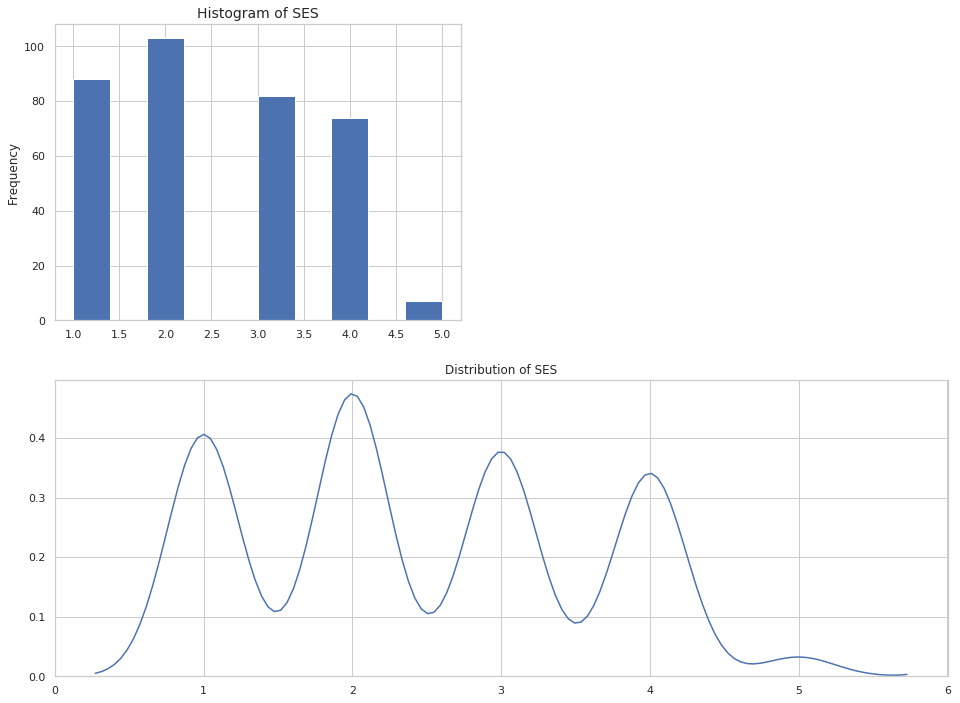

count    354.000000
mean       2.460452
std        1.134005
min        1.000000
25%        2.000000
50%        2.000000
75%        3.000000
max        5.000000
Name: SES, dtype: float64

In [13]:
# lets see the distribution of SES to decide which value we can impute in place of missing values.
univariate_mul('SES')
df_long['SES'].describe()

## As SES has values of integer type so we cannot impute float value of mean
## we can impute median in place as both median and mean have very close values and median in this case is most representative value of SES.

In [14]:
# imputing missing value in SES with median
df_long['SES'].fillna((df_long['SES'].median()), inplace=True)

## Next we will analyze another column having missing values i.e., MMSE

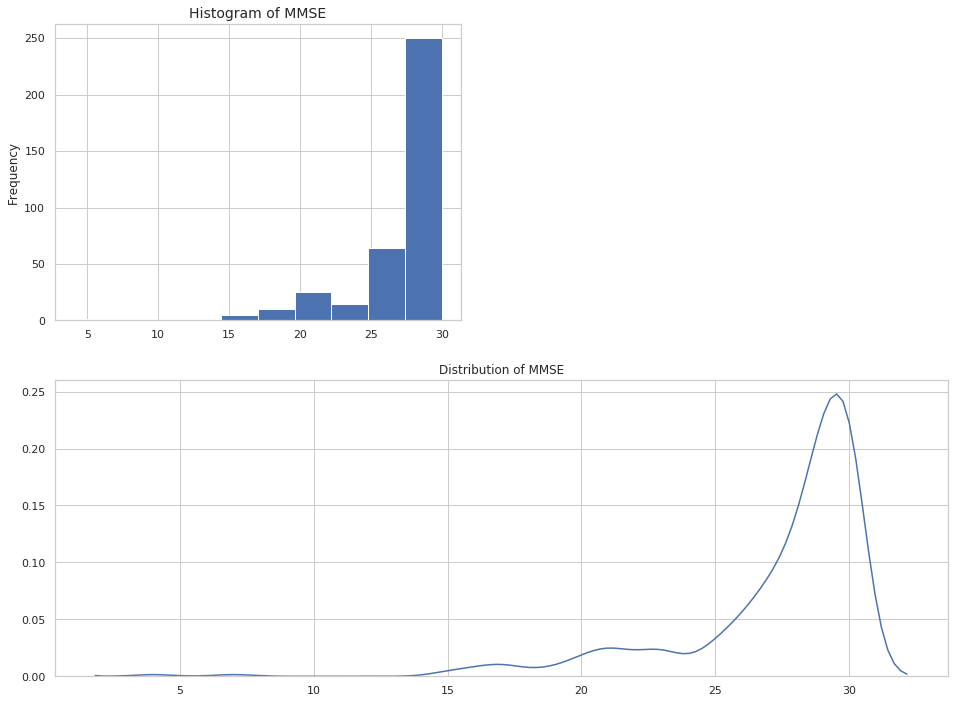

count    371.000000
mean      27.342318
std        3.683244
min        4.000000
25%       27.000000
50%       29.000000
75%       30.000000
max       30.000000
Name: MMSE, dtype: float64

In [15]:
univariate_mul('MMSE')
df_long['MMSE'].describe()

MMSE also has integer values so we cannot impute float. So we will impute it with median value

In [16]:
# imputing MMSE with median values
df_long['MMSE'].fillna((df_long['MMSE'].median()), inplace=True)

In [17]:
# Now, lets check the percentage of missing values in each column
round(df_long.isnull().sum()/len(df_long.index), 2)*100

Group       0.0
Visit       0.0
MR Delay    0.0
M/F         0.0
Age         0.0
EDUC        0.0
SES         0.0
MMSE        0.0
CDR         0.0
eTIV        0.0
nWBV        0.0
ASF         0.0
dtype: float64

Great!! so there no missing values now. lets move towards Univariate Analysis

## 2. Univariate Analysis

In [18]:
# Defining function to create pie chart and bar plot as subplots
def plot_piechart(var):
  plt.figure(figsize=(14,7))
  plt.subplot(121)
  label_list = df_long[var].unique().tolist()
  df_long[var].value_counts().plot.pie(autopct = "%1.0f%%",colors = sns.color_palette("prism",7),startangle = 60,labels=label_list,
  wedgeprops={"linewidth":2,"edgecolor":"k"},shadow =True)
  plt.title("Distribution of "+ var +"  variable")

  plt.subplot(122)
  ax = df_long[var].value_counts().plot(kind="barh")

  for i,j in enumerate(df_long[var].value_counts().values):
    ax.text(.7,i,j,weight = "bold",fontsize=20)

  plt.title("Count of "+ var +" cases")
  plt.show()



First, we will analyze categorical column named Group

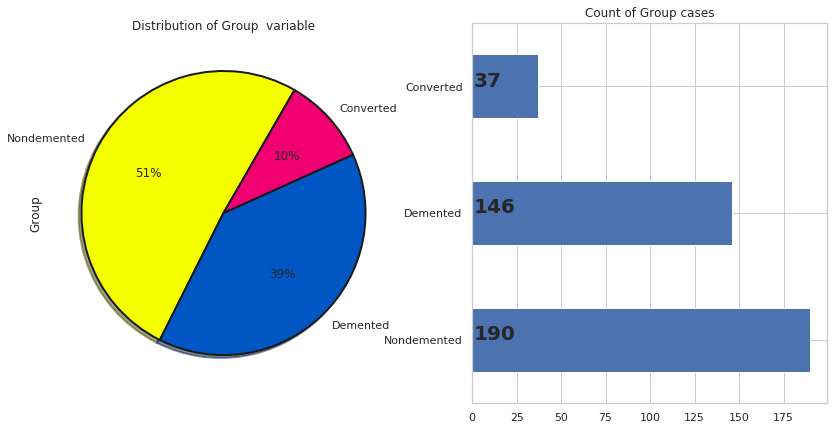

In [19]:
plot_piechart('Group')

# **Observation:**
- As we can see from the above plot, there are around 39% demented cases in the dataset i.e., majority of the data is of Non Demented cases while 10% of the data is of Converted.
- So lets analyze numerical features and perform univariate analysis on those features to see if we find any pattern or some interesting insights.

So, we first begin with analyzing the most important categorical feature i.e., **Clinical Dementia Rating (CDR)**.


In [20]:
df_long['CDR'].describe()

count    373.000000
mean       0.290885
std        0.374557
min        0.000000
25%        0.000000
50%        0.000000
75%        0.500000
max        2.000000
Name: CDR, dtype: float64

The CDR™ Scoring Table provides descriptive anchors that guide the clinician in making appropriate ratings based judgment. This score is useful for characterizing and tracking a patient’s level of impairment/dementia:

1. 0 = Normal
2. 0.5 = Very Mild Dementia or Questionable
3. 1 = Mild Dementia
4. 2 = Moderate Dementia
5. 3 = Severe Dementia

![CDR Scoring Table](https://i.ibb.co/LhhT9n5/CDR.png)

## After seeing from the above table, it has been observed that except Normal score all other score including 0.5 have dementia symptoms because it is very crucial to detect dementia in early stages. So, I am grouping cases having 0 score as Normal and all other score >=0.5 as dementia.

In [21]:
# Plotting CDR with other variable
def univariate_percent_plot(cat):
    fig = plt.figure(figsize=(18,12))
    cmap=plt.cm.Blues
    cmap1=plt.cm.coolwarm_r
    ax1 = fig.add_subplot(221)
    ax2 = fig.add_subplot(222)
    
    result = df_long.groupby(cat).apply (lambda group: (group.CDR == 'Normal').sum() / float(group.CDR.count())
         ).to_frame('Normal')
    result['Dementia'] = 1 -result.Normal
    result.plot(kind='bar', stacked = True,colormap=cmap1, ax=ax1, grid=True)
    ax1.set_title('stacked Bar Plot of '+ cat +' (in %)', fontsize=14)
    ax1.set_ylabel('% Dementia status (Normal vs Dementia)')
    ax1.legend(loc="lower right")
    group_by_stat = df_long.groupby([cat, 'CDR']).size()
    group_by_stat.unstack().plot(kind='bar', stacked=True,ax=ax2,grid=True)
    ax2.set_title('stacked Bar Plot of '+ cat +' (in %)', fontsize=14)
    ax2.set_ylabel('Number of Cases')
    plt.show()



# Categorizing feature CDR
def cat_CDR(n):
    if n == 0:
        return 'Normal'
    
    else:                                         # As we have no cases of sever dementia CDR score=3
        return 'Dementia'

df_long['CDR'] = df_long['CDR'].apply(lambda x: cat_CDR(x))

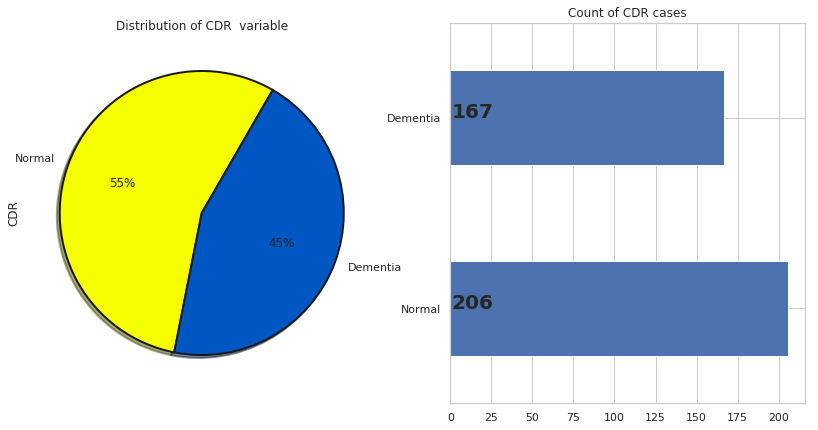

In [22]:
plot_piechart('CDR')

As we can see majority of the cases are Normal while very few cases are of Mild and Moderate dementia.

Next we will analyse another feature named MMSE.

### About MMSE (Mini Mental State Examination)
**Mini-mental state** : A practical method for grading the cognitive state of patients for the clinician study especially for older adults. It is a 30-point questionnaire that is used extensively in clinical and research settings to measure cognitive impairment.

#### Interpretations:
Any score of 24 or more (out of 30) indicates a normal cognition. Below this, scores can indicate severe (≤9 points), moderate (10–18 points) or mild (19–23 points) cognitive impairment.That is, even a maximum score of 30 points can never rule out dementia. Low to very low scores correlate closely with the presence of dementia, although other mental disorders can also lead to abnormal findings on MMSE testing.

In [23]:
df_long['MMSE'].describe()

count    373.000000
mean      27.351206
std        3.675329
min        4.000000
25%       27.000000
50%       29.000000
75%       30.000000
max       30.000000
Name: MMSE, dtype: float64

In [24]:
# Categorizing feature MMSE
def cat_MMSE(n):
    if n >= 24:
        return 'Normal'
    elif n <= 9:
        return 'Severe'
    elif n >= 10 and n <= 18:
        return 'Moderate'
    elif n >= 19 and n <= 23:                                        # As we have no cases of sever dementia CDR score=3
        return 'Mild'

df_long['MMSE'] = df_long['MMSE'].apply(lambda x: cat_MMSE(x))

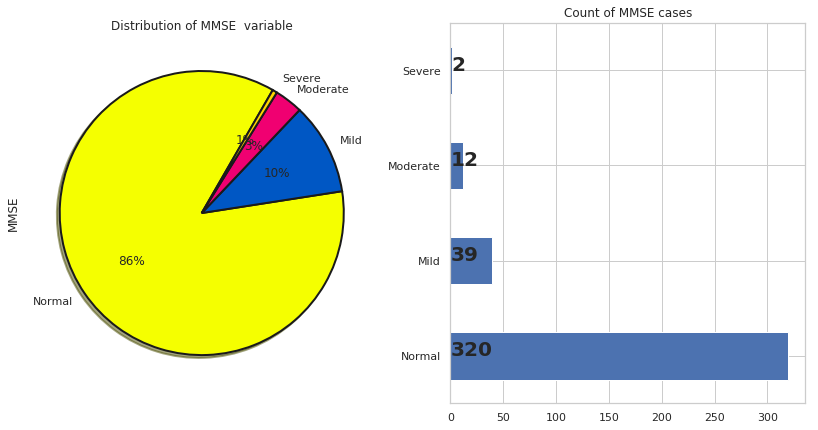

In [25]:
plot_piechart('MMSE')

## Here, also there are majority of cases of normal cognitive impairment whereas very few cases of Mild, Moderate and Severe cognitive Impairment.

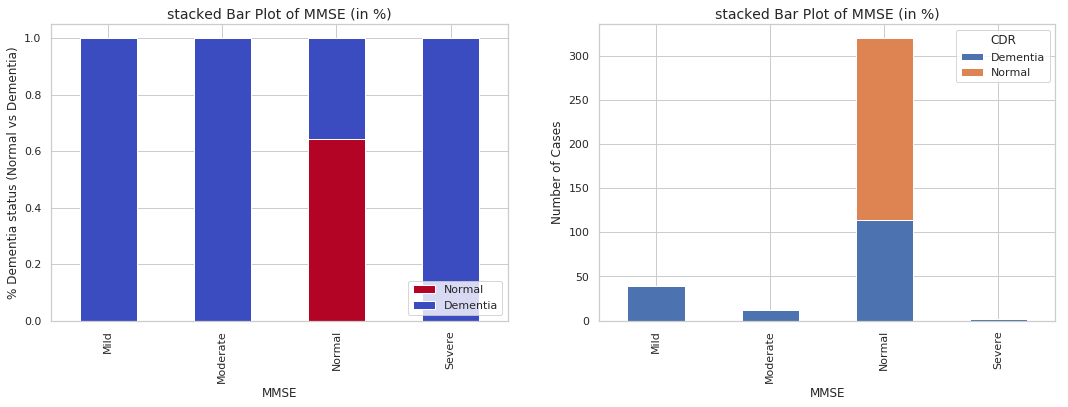

In [26]:
univariate_percent_plot('MMSE')

## As we can see from the above plot, there are around 40% of the cases in Normal MMSE status are of dementia cases accroding to CDR scoring.

## Next we will analyze Age feature to see how age is impacting the dementia status.

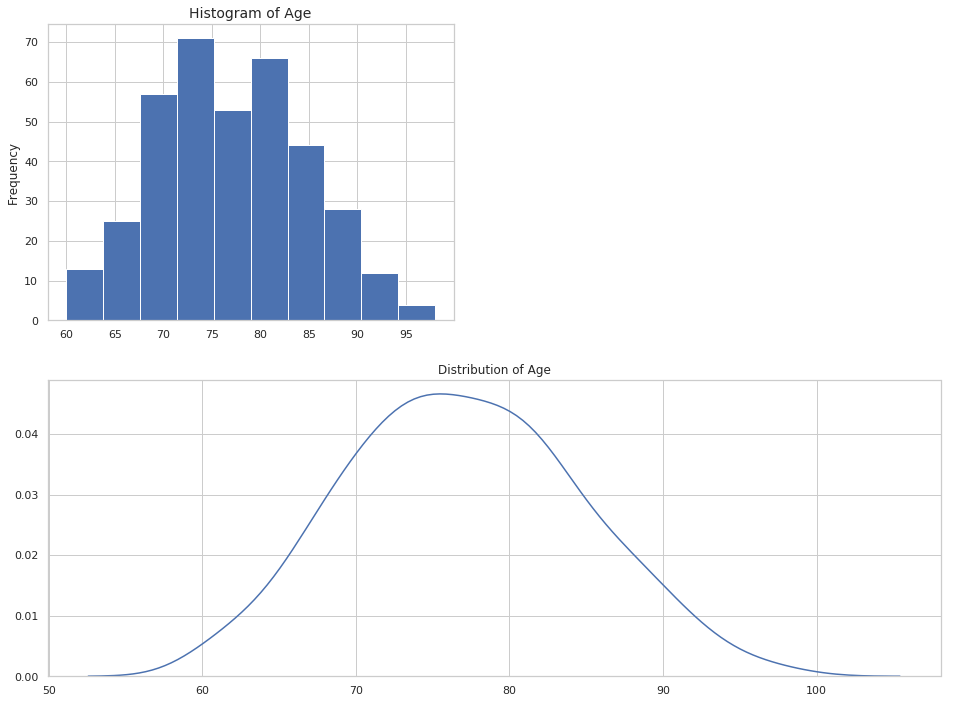

count    373.000000
mean      77.013405
std        7.640957
min       60.000000
25%       71.000000
50%       77.000000
75%       82.000000
max       98.000000
Name: Age, dtype: float64

In [27]:
univariate_mul('Age')
df_long['Age'].describe()

## Age in this dataset is uniformly distributed ranging from 60 years to 98 years.

In [28]:
df_long['age_group'] = pd.cut(df_long['Age'], [60, 70, 80,90, 100], labels=['60-70', '70-80', '80-90','90-100'])
df_long['age_group'].value_counts()

70-80     173
80-90     107
60-70      75
90-100     16
Name: age_group, dtype: int64

# Now plotting age group to see dementia distribution

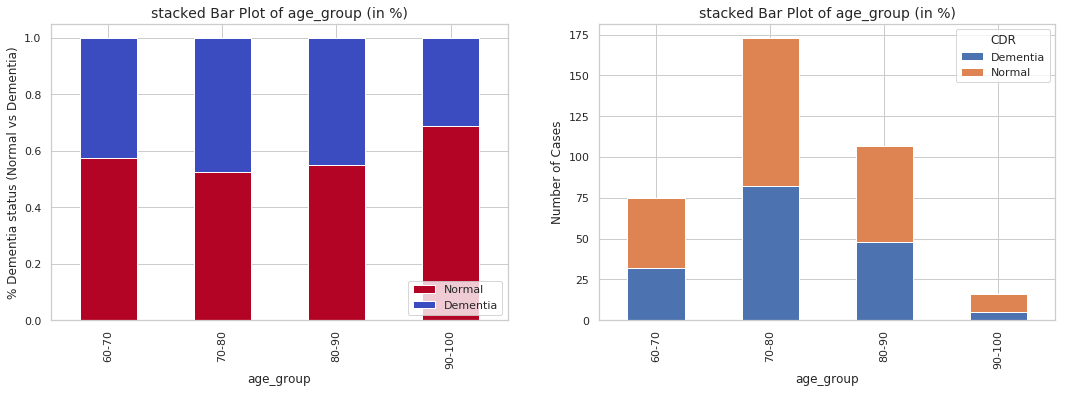

In [29]:
univariate_percent_plot('age_group')

Majority of cases of Dementia are in the age group of **70-80 years** (around 45%) while second most highest cases are in **80-90 years** of age.

## Bivariate Analysis

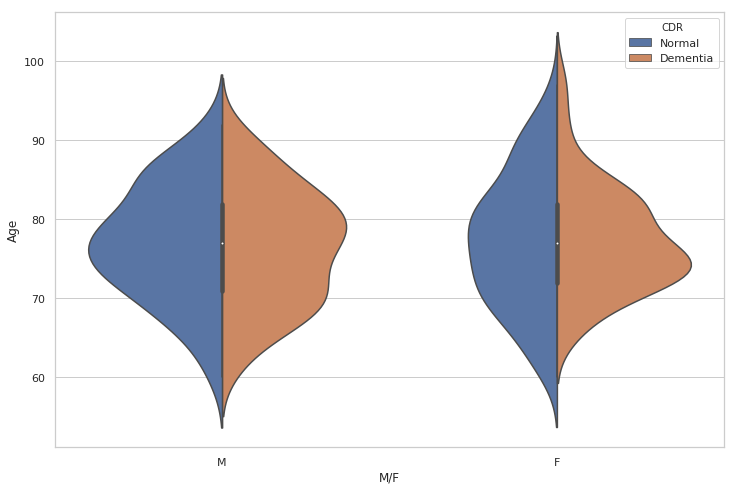

In [30]:
plt.figure(figsize=(12, 8))
ax = sns.violinplot(x="M/F", y="Age",hue="CDR",split=True, data=df_long)
plt.show()

## As we can observe from the above plot, in case of Male most number of dementia cases are reported in the age of around 80 years while in case of females dementia is prevalent in 75 years of Age. One more observation suggests that in case of Males dementia starts early even before 60 years of age while in case of females demetia generally after 60 years of age.

Next we will analyze another important feature named eTIV.

### Estimated total intracranial volume (eTIV):
Intracranial volume (ICV) is an important normalization measure used in morphometric analyses to correct for head size in studies of Alzheimer Disease (AD).
ICV is often used in studies involved with analysis of the cerebral structure under different imaging modalities, such as Magnetic Resonance (MR).

In [31]:
df_long['eTIV'].describe()

count     373.000000
mean     1488.128686
std       176.139286
min      1106.000000
25%      1357.000000
50%      1470.000000
75%      1597.000000
max      2004.000000
Name: eTIV, dtype: float64

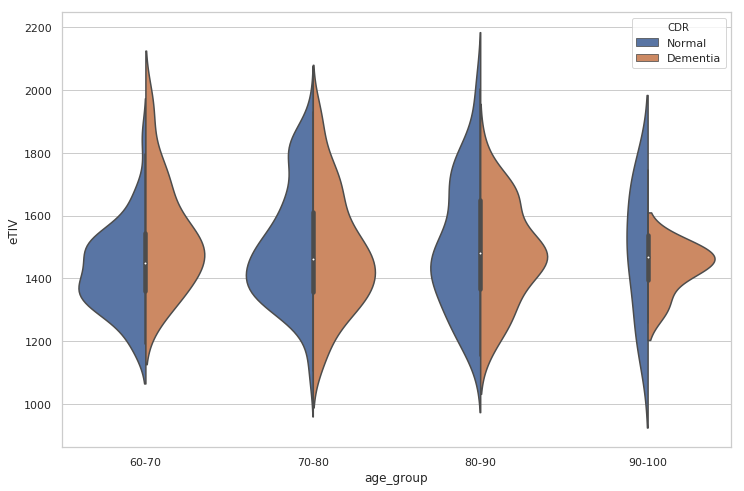

In [32]:
plt.figure(figsize=(12, 8))
ax = sns.violinplot(x="age_group", y="eTIV",hue="CDR",split=True, data=df_long)
plt.show()

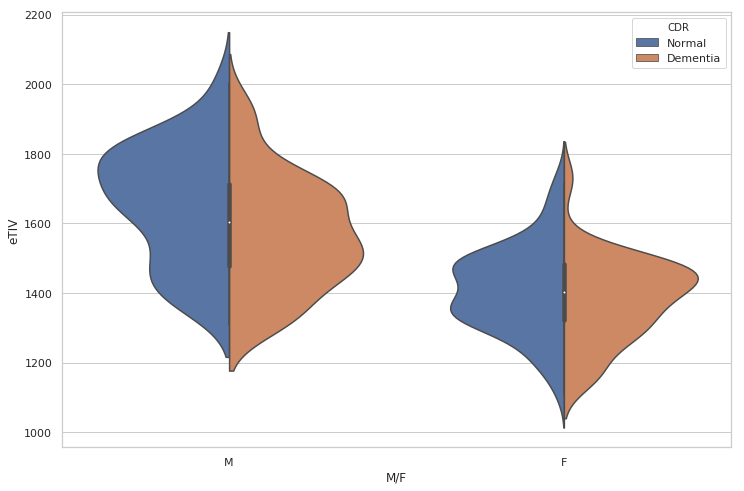

In [33]:
plt.figure(figsize=(12, 8))
ax = sns.violinplot(x="M/F", y="eTIV",hue="CDR",split=True, data=df_long)
plt.show()

## **Normalized whole-brain volume**, expressed as a percent of all voxels in the atlas-masked image that are labeled as gray or white matter by the automated tissue segmentation process

## nWBV and CDR

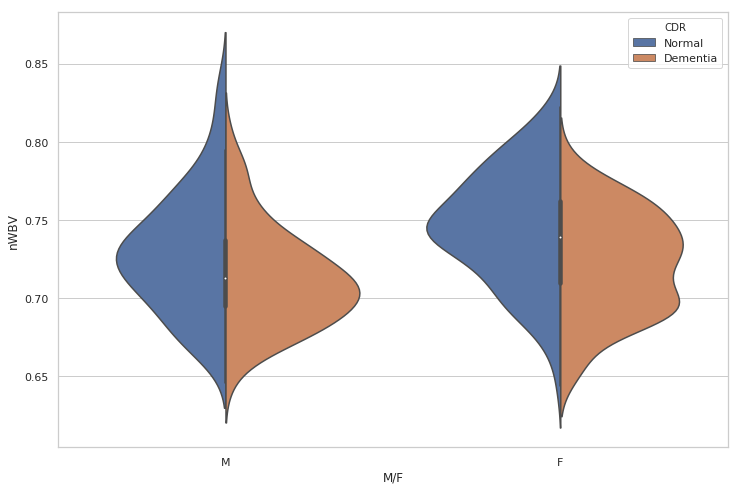

In [34]:
plt.figure(figsize=(12, 8))
ax = sns.violinplot(x="M/F", y="nWBV",hue="CDR",split=True, data=df_long)
plt.show()


In [35]:
df_long['EDUC'].describe()

count    373.000000
mean      14.597855
std        2.876339
min        6.000000
25%       12.000000
50%       15.000000
75%       16.000000
max       23.000000
Name: EDUC, dtype: float64

## EDUC and CDR

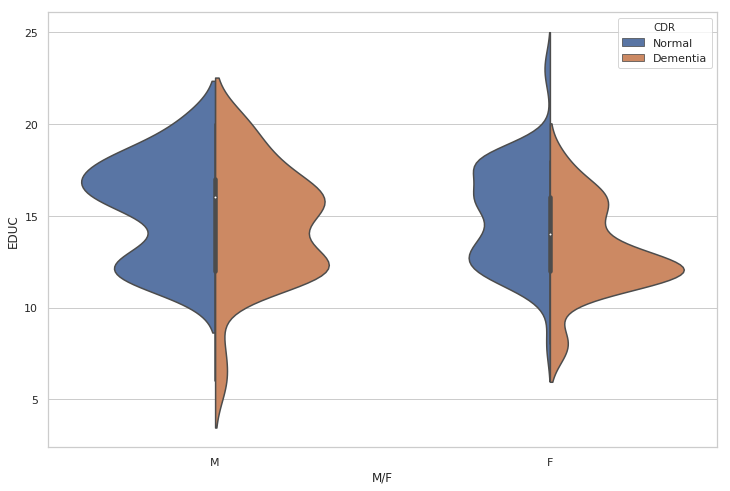

In [36]:
plt.figure(figsize=(12, 8))
ax = sns.violinplot(x="M/F", y="EDUC",hue="CDR",split=True, data=df_long)
plt.show()


## **Observation:**

## As we can observe from the above plot,Mens having education level between 10 and 17 have higher level of dementia cases and mens started to show dymentia symptoms with less education levels starting from 4 years whereas females starts showing dymentia symptoms after 6 years of education level having highest peak at 13 years of age.

**SES - Socioeconomic status**, classified into categories from 1 (highest status) to 5 (lowest status)

In [37]:
df_long['SES'].describe()

count    373.000000
mean       2.436997
std        1.109307
min        1.000000
25%        2.000000
50%        2.000000
75%        3.000000
max        5.000000
Name: SES, dtype: float64

# Now plotting socio economic status to see dementia distribution

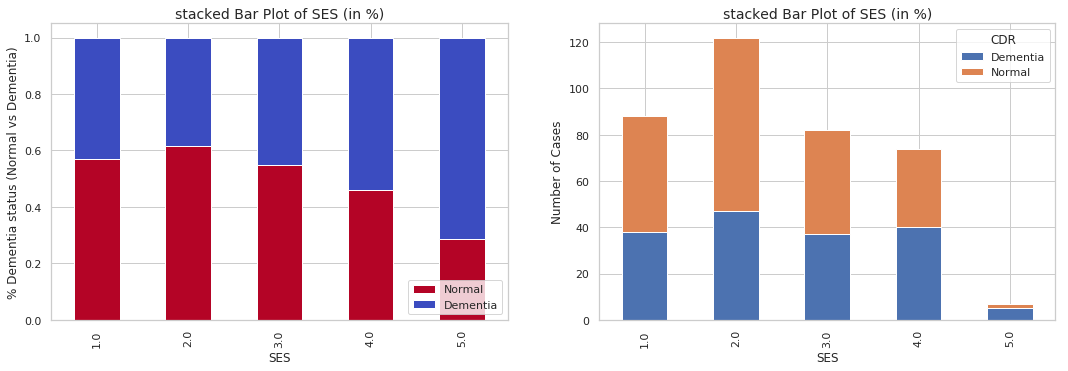

In [38]:
univariate_percent_plot('SES')

## **Observation:**

### At lowest level of socio economic status there is a highest probability of dementia which may be due to lower economic condition which results in depression, mental sufferings which in turn results in dementia.

SES and CDR

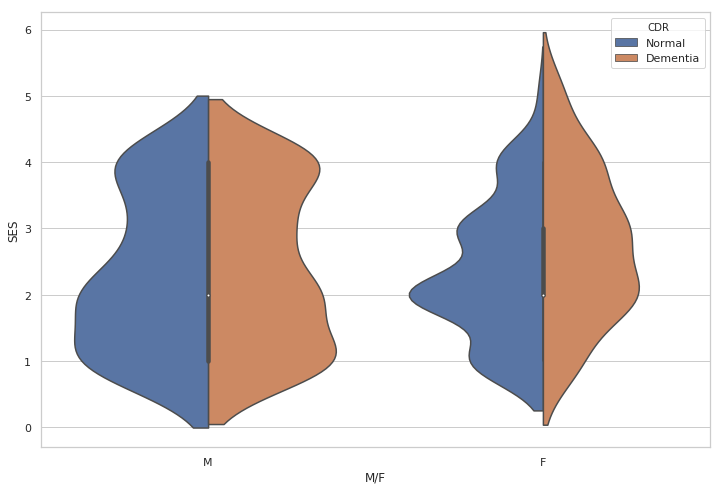

In [39]:
plt.figure(figsize=(12, 8))
ax = sns.violinplot(x="M/F", y="SES",hue="CDR",split=True, data=df_long)
plt.show()


## **Observation:**

- Interesting pattern observed from the above plot that in mens there are two peaks of highest dementia cases one at 1 (Highest status) and 4(lower status) and in between 1 and 4 there less instances of dementia cases whereas in case of females highest peak is at 2 whereas at 1 and 5 there are slightly less dementia cases reported.
- It suggests that womens have less dementia probability at extreme higher and extreme lower level of socio economic status while mens have exactly opposite phenomenon.

### **ASF - Atlas scaling factor** (unitless). Computed scaling factor that transforms native-space brain and skull to the atlas target

In [40]:
df_long['ASF'].describe()

count    373.000000
mean       1.195461
std        0.138092
min        0.876000
25%        1.099000
50%        1.194000
75%        1.293000
max        1.587000
Name: ASF, dtype: float64

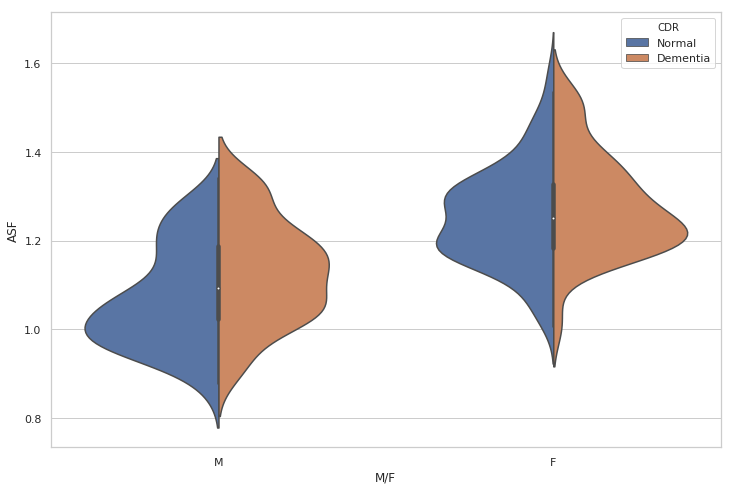

In [41]:
plt.figure(figsize=(12, 8))
ax = sns.violinplot(x="M/F", y="ASF",hue="CDR",split=True, data=df_long)
plt.show()

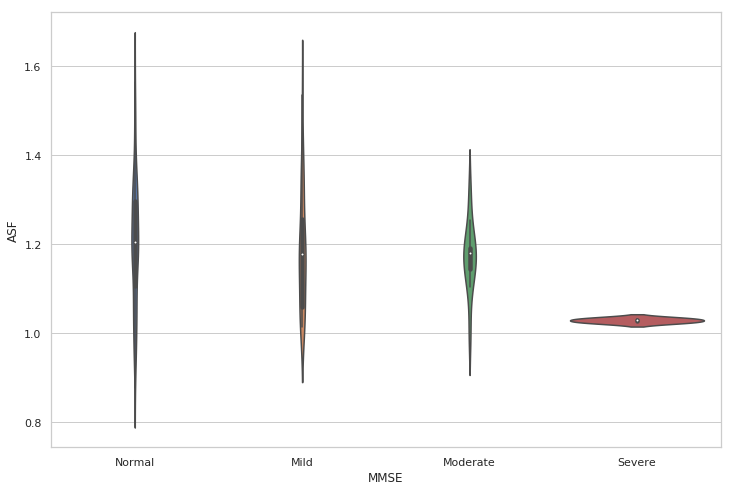

In [42]:
plt.figure(figsize=(12, 8))
ax = sns.violinplot(x="MMSE", y="ASF",split=True, data=df_long)
plt.show()

### From the above plot we can get the intuition about ASF as in  case of normal patients the value of ASF distributed between 0.8 and 1.6 but as the patients started showing dementia cases its value centered around 1 as in case of Mild, Moderate and Severe it shrinks down to 1.1

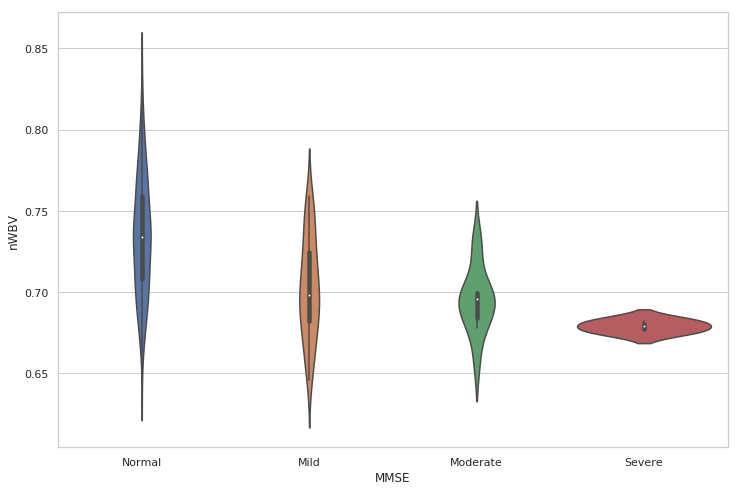

In [43]:
plt.figure(figsize=(12, 8))
ax = sns.violinplot(x="MMSE", y="nWBV",split=True, data=df_long)
plt.show()

**Observation:**

Same pattern observed in case of nWBV as the dementia level increases nWBV centered between 0.65 and 0.70.

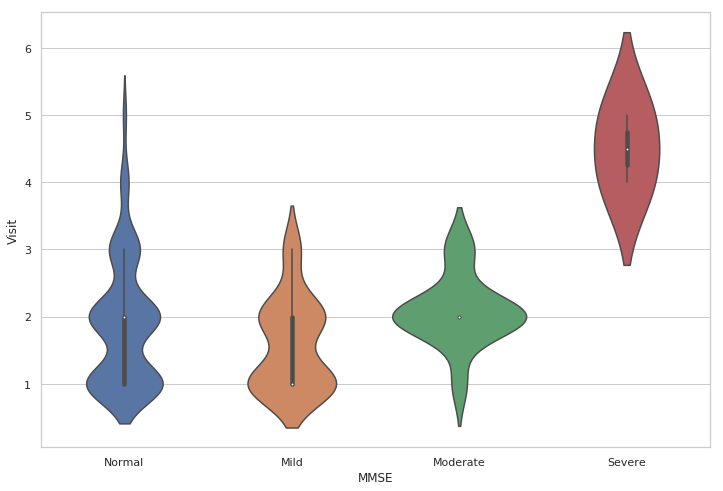

In [44]:
plt.figure(figsize=(12, 8))
ax = sns.violinplot(x="MMSE", y="Visit",split=True, data=df_long)
plt.show()

### **Observation:**

### Severe Dementia cases starts reporting as the number of visits increases to more than 3 whereas normal cases are also reported after higher number of visits more than 3 but they are very few in number. 

## Multicollinearity

### In this step, we will see how much variables are correlated with another

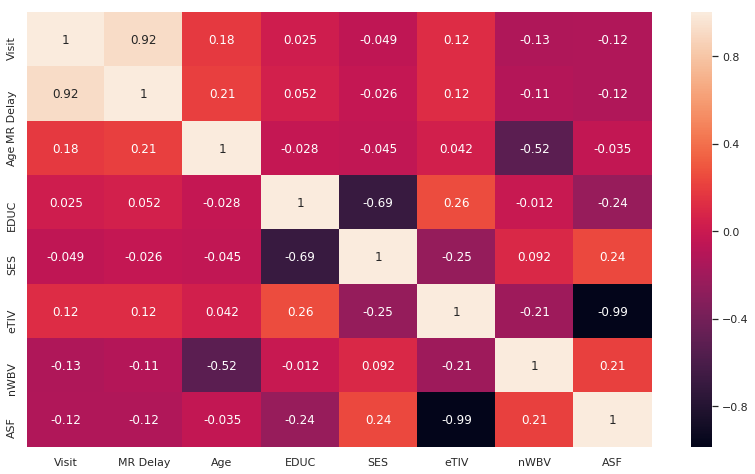

In [45]:
plt.figure(figsize=(14, 8))
sns.heatmap(df_long.corr(), annot=True)
plt.show()

# Key Insights:
- Most of the cases of dementia observed in the age group of 70 - 80 years of Age.
- Mens develop dementia at early age before 60 years while womens have tendency of dementia at later age of later than 60 years
- In mens dementia starts at an education level of 4 years and most prevalent at education level of 12 years and 16 years and it can also extend upto more than 20 years of education level, while in womens dementia starts after 5 years of education level and most prevalent around 12 to 13 years of education level and it started to decrease as womens education level increase
- Dementia is prevalent in Mens  having highest and lowest socio economic status while womens having medium socio economic status have higher dementia cases.
- Lower values of ASF close to 1 corresponds to severe dementia cases.
- Severe dementia is diagnosed after minnimum 3 number of visits. 